In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


In [5]:
df.shape

(3676, 23)

In [6]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'property_type', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

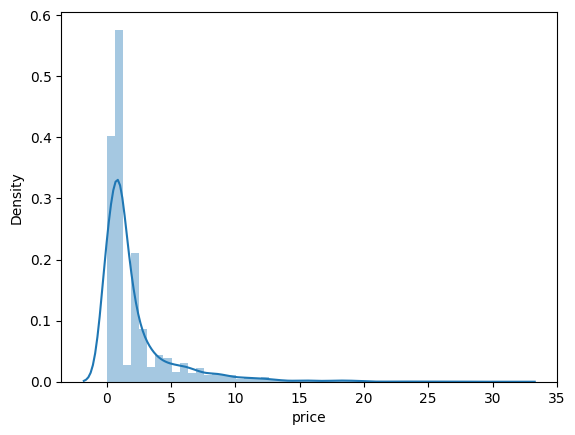

In [16]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

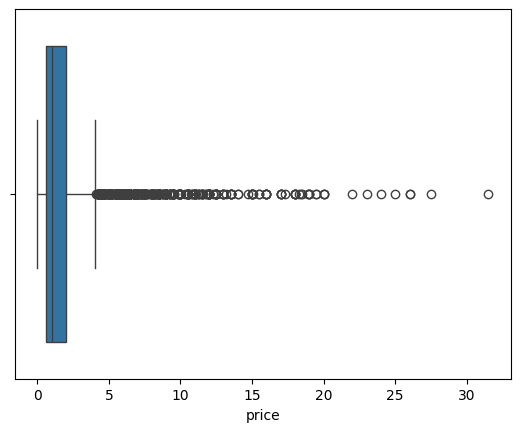

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers 
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(517,
 count    517.000000
 mean       8.265338
 std        4.091042
 min        4.120000
 25%        5.500000
 50%        7.000000
 75%        9.500000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price', ascending=False).head(20)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1354,arjun marg/ sector- 26 phase- 1/ golf course road,31.50,sector 26,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,house,NaN,9000.0,NaN,1,1,1,1,0,0,74
2550,independent,27.50,sector 43,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,house,NaN,11286.0,NaN,1,1,0,1,1,2,42
2328,independent,26.00,sector 26,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,house,NaN,400.0,350.0,1,1,1,1,0,0,72
144,dlf city plots,26.00,sector 26,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,house,NaN,4545.0,NaN,1,1,0,1,1,2,138
375,suncity township,25.00,sector 54,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,house,NaN,1000.0,NaN,1,1,1,1,0,1,0
73,emaar the palm springs,24.00,sector 54,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,house,NaN,400.0,NaN,1,1,0,1,0,2,122
28,independent,23.00,sector 26,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,house,NaN,9000.0,NaN,1,1,1,1,0,2,145
3077,vipul tatvam villa,22.00,sector 48,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,house,NaN,1000.0,NaN,0,1,0,0,0,1,54
428,luxury dlf city floors,20.00,sector 26,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,house,NaN,500.0,NaN,0,1,0,0,0,2,31
1361,dlf city plots,20.00,sector 26,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,house,NaN,4518.0,NaN,1,1,1,1,0,2,153


on the basis of price col we can say that there are some genuine outliers but there are some data errors as well

#### price_per_sqft

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

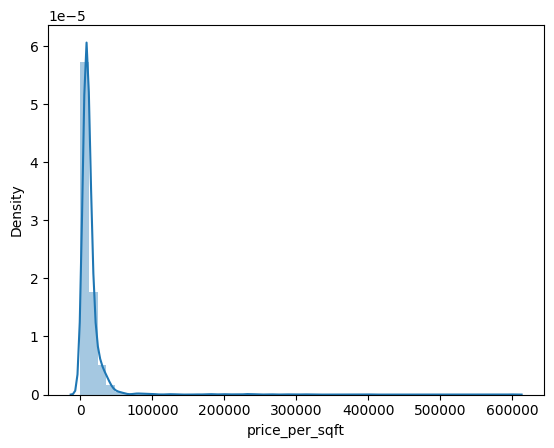

In [12]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

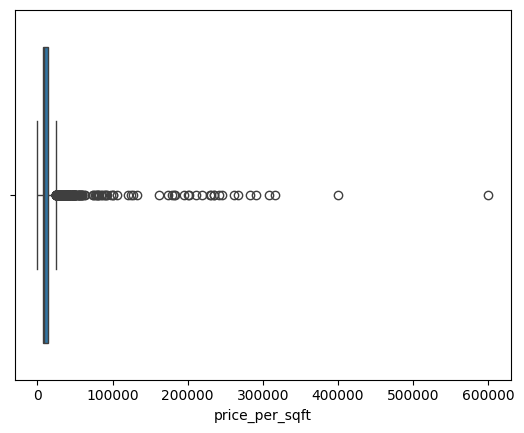

In [17]:
sns.boxplot(x=df['price_per_sqft'])

In [19]:
# Calculate the IQR for the 'price' column
# Calculate the IQR for the 'price' column

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers 
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [20]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x< 1000 else x)


/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/1500019611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x< 1000 else x)


In [22]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [23]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     27473.977401
std      14033.120110
min        463.000000
25%      24518.250000
50%      29392.000000
75%      35471.250000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [24]:
df.update(outliers_sqft)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

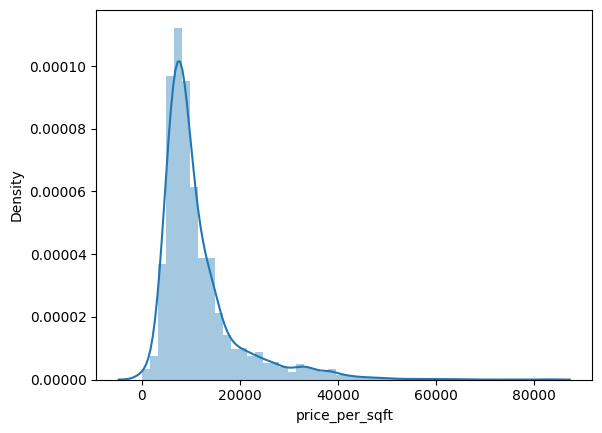

In [26]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

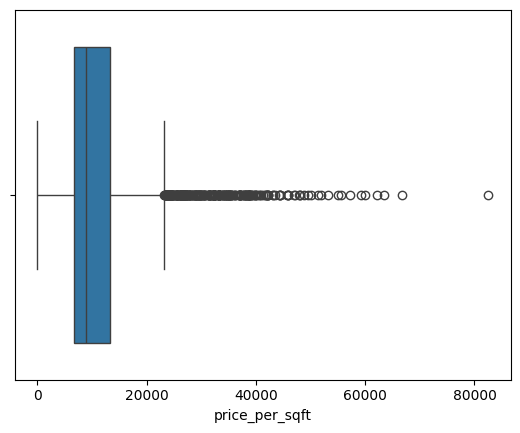

In [27]:
sns.boxplot(x=df['price_per_sqft'])

In [28]:
df[df['price_per_sqft']>50000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
73,emaar the palm springs,24.00,sector 54,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,house,NaN,400.0,NaN,1,1,0,1,0,2,122
144,dlf city plots,26.00,sector 26,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,house,NaN,4545.0,NaN,1,1,0,1,1,2,138
393,emaar mgf marbella,18.00,sector 66,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,house,NaN,3240.0,NaN,1,1,0,1,0,0,75
581,malibu towne,8.50,sector 47,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,house,NaN,1600.0,NaN,0,0,0,0,0,2,99
1115,independent,16.00,sector 25,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,house,NaN,325.0,300.0,1,1,1,1,0,0,72
1900,unitech escape,10.80,sector 50,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,house,NaN,250.0,200.0,1,1,1,1,0,2,103
2131,project housing board colony,8.00,sector 31,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,house,NaN,140.0,NaN,0,0,0,0,0,1,0
2320,nul,12.50,sector 28,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,house,NaN,2430.0,NaN,1,1,0,1,1,0,137
2328,independent,26.00,sector 26,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,house,NaN,400.0,350.0,1,1,1,1,0,0,72
2867,emaar the palm springs,14.00,sector 54,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,house,NaN,2250.0,NaN,1,1,0,0,0,2,160


In [29]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

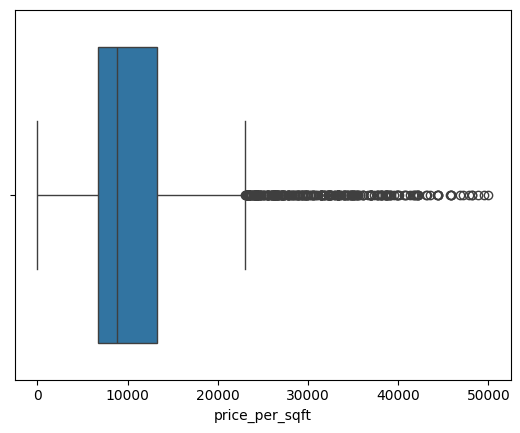

In [30]:
sns.boxplot(x=df['price_per_sqft'])

#### Area

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

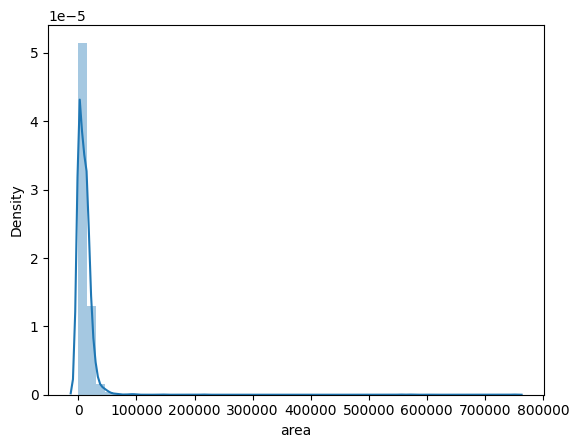

In [33]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

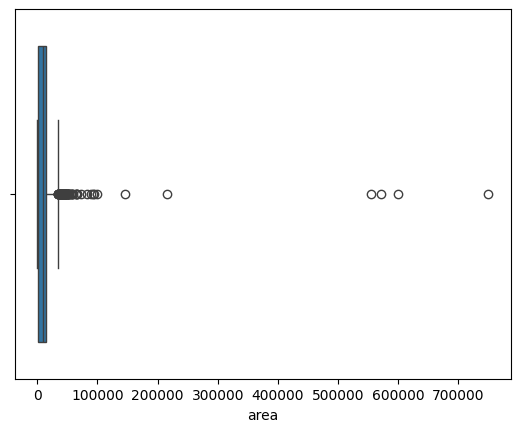

In [34]:
sns.boxplot(x=df['area'])

In [35]:
df['area'].describe()

count      3647.000000
mean      10516.267069
std       22976.847750
min         145.000000
25%        1377.000000
50%        9091.000000
75%       14545.000000
max      750000.000000
Name: area, dtype: float64

In [36]:
df[df['area']>100000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
36,independent,5.00,sector 50,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,house,NaN,2.0,NaN,1,1,0,1,1,2,0
1331,signature global solera 2,0.05,sector 107,9.0,555556.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,NaN,514396.0,0,0,0,0,0,1,44
1516,godrej air,2.00,sector 85,1379.0,145033.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,NaN,18122.0,1,0,0,1,1,2,44
2372,ramsons kshitij,0.03,sector 95,5.0,600000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,NaN,607936.0,1,0,0,0,1,1,65
2484,hcbs sports ville,0.03,sohna road,4.0,750000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,NaN,737147.0,NaN,0,0,0,0,0,0,44
3717,signature the roselia,0.04,sector 95,7.0,571429.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,NaN,569243.0,0,0,0,0,0,1,76


In [37]:
df = df[df['area'] < 100000]

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

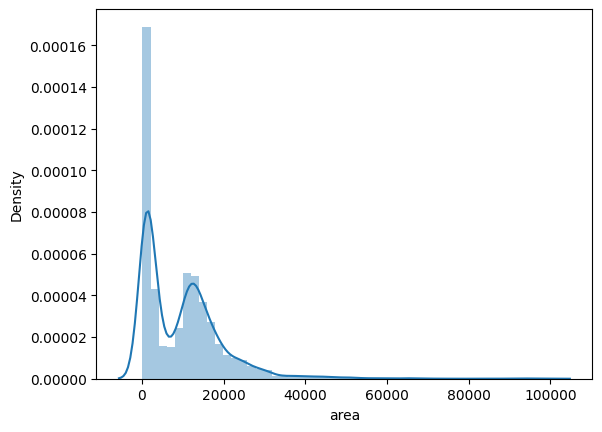

In [38]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

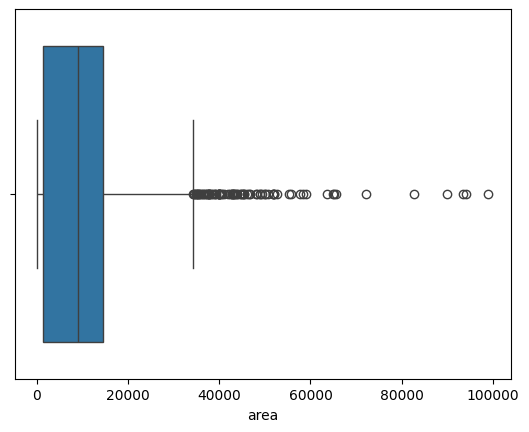

In [39]:
sns.boxplot(x=df['area'])

In [51]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3341,the penthouses at the hibiscus,8.00,sector 50,8500.0,94118.0,Carpet area: 10000 (929.03 sq.m.),4,4,3,9.0,South-East,Moderately Old,NaN,NaN,NaN,10000.00,0,1,0,0,0,1,35
2050,krrish provence estate,7.00,gwal pahari,7500.0,93333.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,NaN,10000.0,NaN,NaN,0,1,0,1,1,1,49
863,the penthouses at the hibiscus,8.00,sector 50,8888.0,90009.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,7.0,South-East,Moderately Old,NaN,NaN,NaN,9000.00,0,1,0,0,0,1,35
2145,ganpati heights apartment,1.25,sector 13,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,house,NaN,115.0,NaN,0,0,0,0,1,1,7
331,godrej icon,1.00,sector 88a,1384.0,72254.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,NaN,1175.11,0,0,0,0,0,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,smart world gems,1.00,sector 89,9972.0,10028.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,3.0,NaN,New Property,NaN,NaN,NaN,1103.00,0,0,1,0,0,1,77
2879,orchid petals,1.00,sector 49,9972.0,10028.0,Super Built up area 1805(167.69 sq.m.),3,3,3,2.0,East,Old Property,NaN,1805.0,NaN,NaN,0,0,0,0,0,2,90
1555,smart world gems,1.00,sector 89,9972.0,10028.0,Built Up area: 1103 (102.47 sq.m.),3,1,0,0.0,NaN,Undefined,NaN,NaN,1103.0,NaN,0,0,0,0,0,1,45
2121,paras dews,1.00,sector 106,9978.0,10022.0,Super Built up area 2355(218.79 sq.m.)Built Up...,4,6,3+,10.0,North-West,Relatively New,NaN,2355.0,1535.0,1403.00,0,1,0,0,0,1,174


In [49]:
df.drop(index=[932,763,2584,613],inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

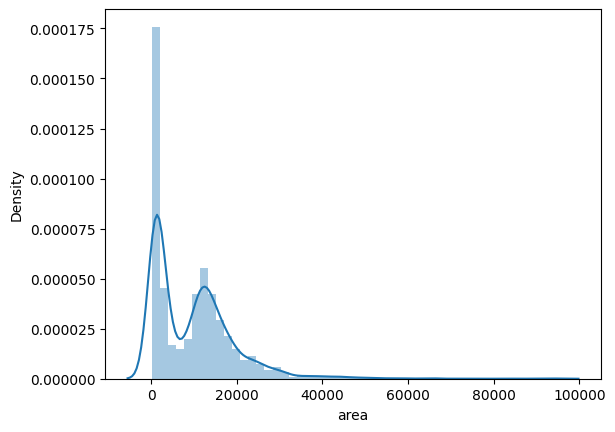

In [52]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

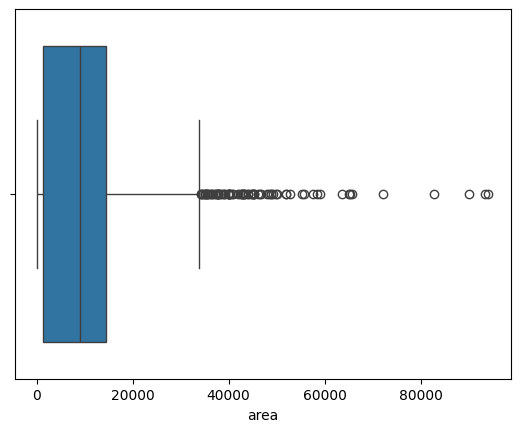

In [53]:
sns.boxplot(x=df['area'])

In [54]:
df['area'].describe()

count     3637.000000
mean      9695.417102
std       9718.715237
min        145.000000
25%       1374.000000
50%       9034.000000
75%      14489.000000
max      94118.000000
Name: area, dtype: float64

In [55]:
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3507,independent,5.00,sector 54,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,house,NaN,1161.0,NaN,0,1,0,0,0,0,49
2623,independent,4.50,sector 43,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,house,NaN,1152.0,NaN,0,1,0,0,0,0,22
2796,independent,3.93,sector 17a,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,house,NaN,1622.0,NaN,1,1,1,1,0,1,74
2888,independent,3.87,sector 17a,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,house,NaN,7500.0,NaN,1,0,1,0,0,1,68
3729,private house,7.05,sector 55,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,house,NaN,1503.0,NaN,0,0,0,0,1,0,57
624,independent,5.50,sector 54,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,house,NaN,1440.0,NaN,0,1,0,0,0,0,70
2538,independent,9.19,sector 55,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,house,NaN,2700.0,NaN,0,1,0,1,0,2,49
1361,dlf city plots,20.00,sector 26,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,house,NaN,4518.0,NaN,1,1,1,1,0,2,153
428,luxury dlf city floors,20.00,sector 26,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,house,NaN,500.0,NaN,0,1,0,0,0,2,31
1813,independent,12.00,sector 40,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,house,NaN,3078.0,NaN,1,1,1,1,0,2,0


In [56]:
df = df[df['bedRoom'] <= 10]

In [57]:
df.shape

(3592, 23)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

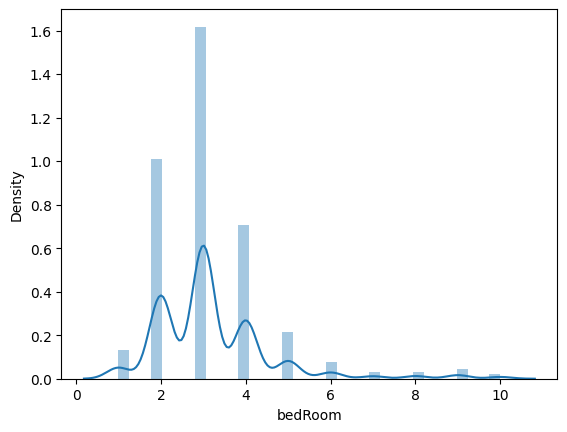

In [59]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

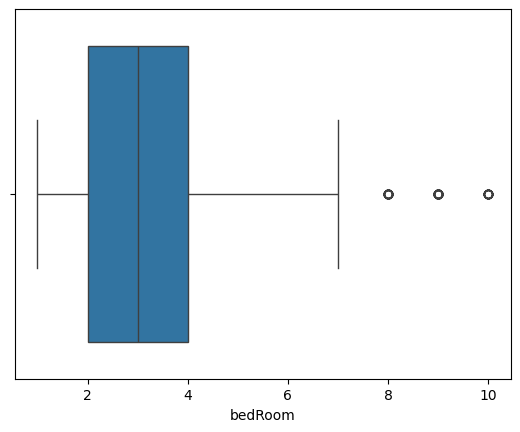

In [60]:
sns.boxplot(x=df['bedRoom'])

In [61]:
df['bedRoom'].describe()

count    3592.000000
mean        3.201281
std         1.394331
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

#### Bathroom

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

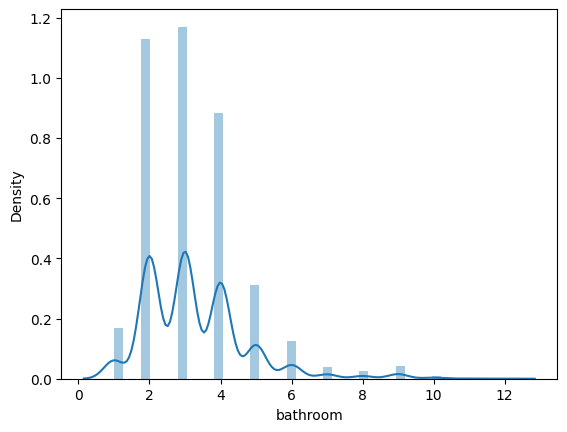

In [62]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

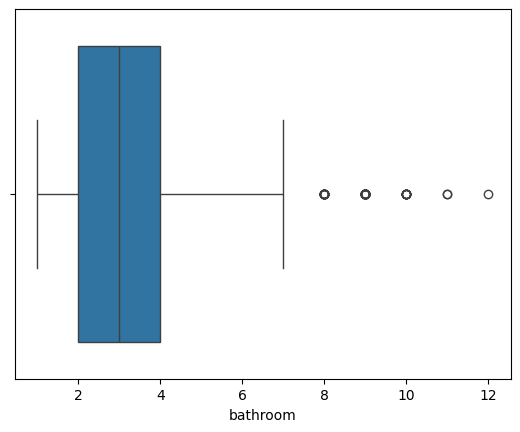

In [63]:
sns.boxplot(x=df['bathroom'])

In [64]:
df[df['bathroom'] > 10].sort_values('bathroom', ascending=False)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
770,adani brahma samsara,18.02,sector 60,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,house,NaN,6390.0,NaN,0,1,0,0,0,2,146
277,independent,7.00,sector 39,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,house,NaN,7000.0,NaN,0,0,0,1,0,0,38
3274,independent,11.00,sector 24,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,house,NaN,5000.0,NaN,1,1,0,1,1,2,39


In [65]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


#### super built up area

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

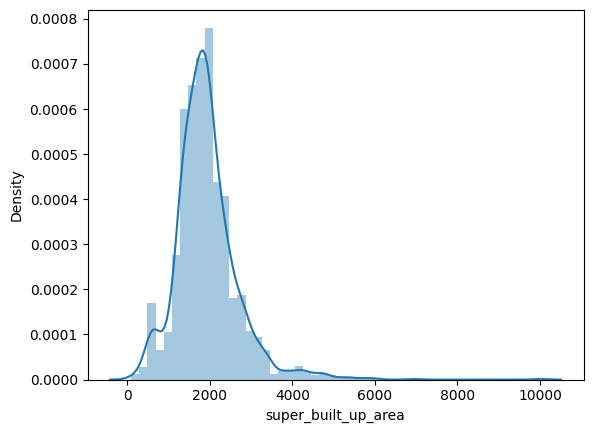

In [66]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

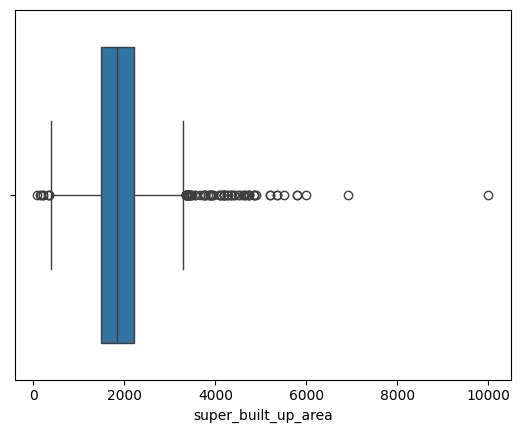

In [67]:
sns.boxplot(x=df['super_built_up_area'])

In [68]:
df['super_built_up_area'].describe()

count     1874.000000
mean      1924.665715
std        763.974663
min         89.000000
25%       1479.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [69]:
df[df['super_built_up_area']> 6000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
778,bestech park view grand spa,4.0,sector 81,6786.0,58945.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,NaN,6926.0,NaN,NaN,0,1,0,0,0,2,140
2050,krrish provence estate,7.0,gwal pahari,7500.0,93333.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,NaN,10000.0,NaN,NaN,0,1,0,1,1,1,49


#### built up area

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

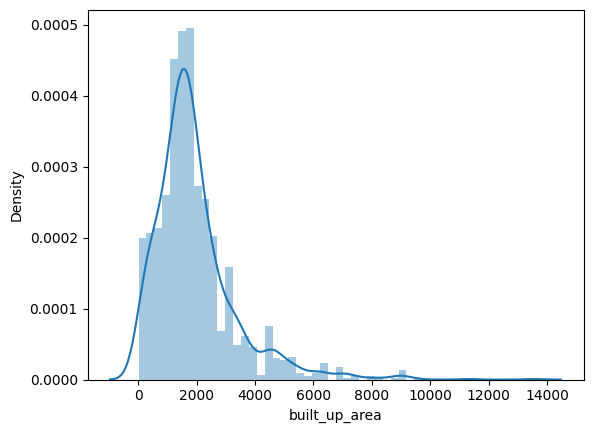

In [70]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

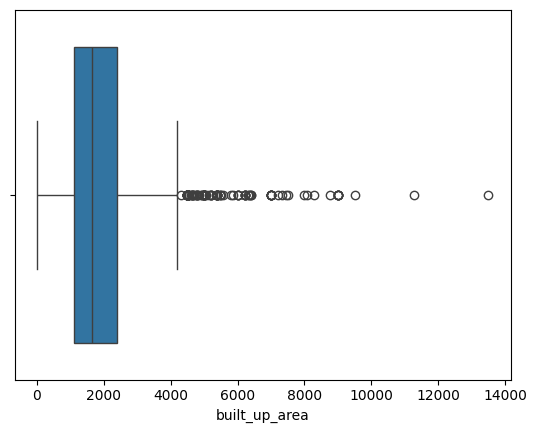

In [71]:
sns.boxplot(x=df['built_up_area'])

In [72]:
df[df['built_up_area']>10000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
273,independent,0.85,sector 4,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,house,NaN,13500.0,NaN,0,0,0,0,1,1,0
2550,independent,27.50,sector 43,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,house,NaN,11286.0,NaN,1,1,0,1,1,2,42


#### carpet area

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

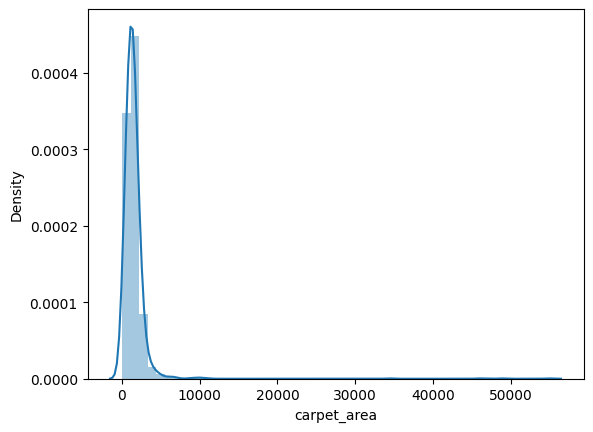

In [73]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

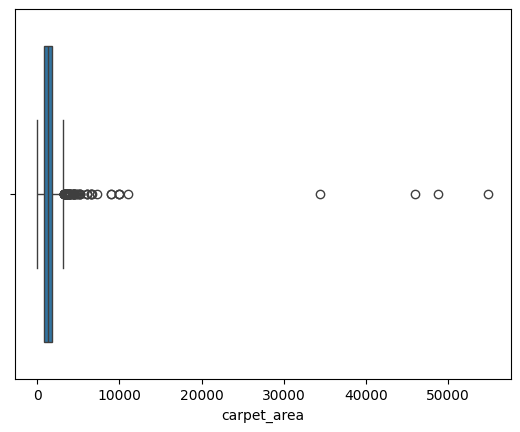

In [75]:
sns.boxplot(x=df['carpet_area'])

In [76]:
df[df['carpet_area'] > 10000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1014,rof ananda,0.03,sector 95,60.0,50000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.0,0,0,0,0,0,1,37
1192,signature the serenas,0.02,sohna road,57.0,35088.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.0,1,0,0,0,0,1,37
1956,m3m golfestate,1.00,sector 65,12000.0,8333.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0,1,0,0,0,1,60
2556,ramsons kshitij,0.02,sector 95,53.0,37736.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.0,0,0,0,0,1,1,33
3575,rof ananda,0.02,sector 95,61.0,32787.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,NaN,34401.0,0,0,0,0,0,1,68


In [77]:
df.loc[1014, 'carpet_area'] = 50000

In [78]:
df[df['carpet_area'] > 10000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1014,rof ananda,0.03,sector 95,60.0,50000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,NaN,50000.0,0,0,0,0,0,1,37
1192,signature the serenas,0.02,sohna road,57.0,35088.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.0,1,0,0,0,0,1,37
1956,m3m golfestate,1.00,sector 65,12000.0,8333.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0,1,0,0,0,1,60
2556,ramsons kshitij,0.02,sector 95,53.0,37736.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.0,0,0,0,0,1,1,33
3575,rof ananda,0.02,sector 95,61.0,32787.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,NaN,34401.0,0,0,0,0,0,1,68


In [79]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

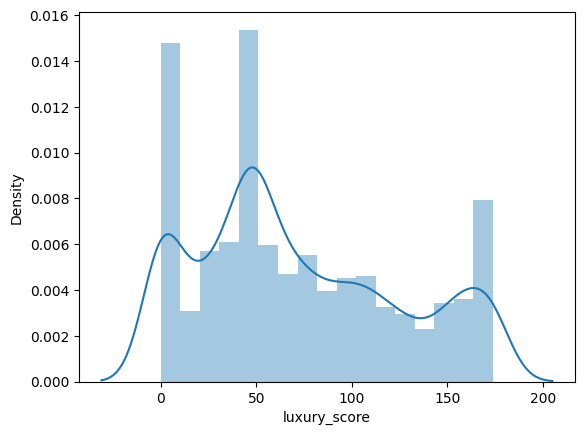

In [80]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

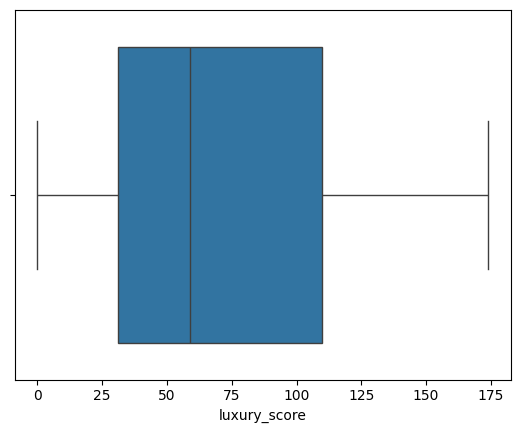

In [81]:
sns.boxplot(x=df['luxury_score'])

In [82]:
df.shape

(3592, 23)

In [83]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [84]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,2053.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,750.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,627.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_9940/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

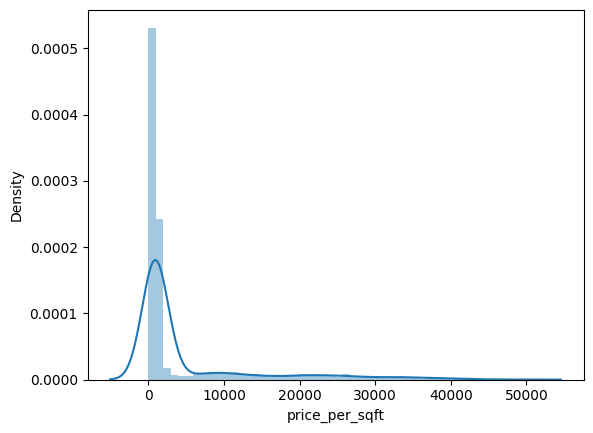

In [85]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

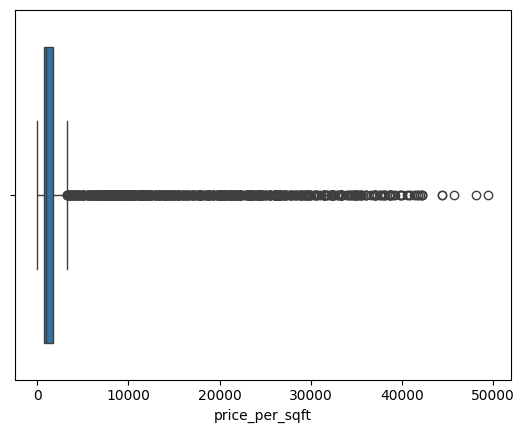

In [86]:
sns.boxplot(x=df['price_per_sqft'])

In [88]:
df[df['price_per_sqft'] > 42000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
489,independent,9.5,sector 43,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,house,NaN,300.0,250.0,0,1,0,1,0,2,88
638,independent,12.0,sector 28,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,house,NaN,2844.0,NaN,0,1,1,1,0,2,60
1252,independent,9.9,sector 105,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,house,NaN,2000.0,1800.0,0,0,0,0,0,1,0
1256,independent,13.0,sector 25,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,house,NaN,2844.0,NaN,1,1,1,1,0,0,0
1599,independent,20.0,sector 26,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,house,NaN,4500.0,NaN,0,1,0,1,0,0,97
1621,independent,19.0,sector 26,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,house,NaN,4500.0,NaN,1,1,1,1,0,2,103
2198,sushant lok 1 builder floors,13.0,sector 43,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,house,NaN,2700.0,NaN,0,0,0,1,0,2,7
2252,dlf city plots,19.0,sector 26,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,house,NaN,4518.0,NaN,1,1,0,0,0,2,121
2679,independent,5.0,sector 55,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,house,NaN,115.0,100.0,0,0,0,0,1,2,44


In [89]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

171.07

In [91]:
df[(df['area']/df['bedRoom'])<171]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
49,prime habitat,0.02,sector 99a,604.0,331.0,Carpet area: 448 (41.62 sq.m.),2,2,1,10.0,South,Relatively New,NaN,NaN,NaN,448.00,0,0,0,0,0,1,67
147,rajendra park gurgaon,0.37,sector 105,10278.0,360.0,Plot area 360(33.45 sq.m.),4,3,2,3.0,East,Relatively New,house,NaN,360.0,NaN,0,0,0,0,0,1,0
150,mvn athens,0.02,sohna road,590.0,339.0,Carpet area: 457.52 (42.5 sq.m.),2,2,1,0.0,NaN,Relatively New,NaN,NaN,NaN,457.52,0,0,0,0,0,2,69
171,not applicable,0.75,sector 4,11719.0,640.0,Plot area 640(59.46 sq.m.),5,4,3,2.0,NaN,Moderately Old,house,NaN,640.0,NaN,0,0,0,0,0,1,0
220,independent,0.50,sector 3 phase 3 extension,11111.0,450.0,Plot area 450(41.81 sq.m.),5,3,3,3.0,NaN,Moderately Old,house,NaN,450.0,NaN,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,independent,4.50,sector 24,33333.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,10,8,3+,4.0,East,Relatively New,house,NaN,160.0,150.00,0,1,1,0,0,2,56
3685,independent,0.60,sector 105,11111.0,540.0,Plot area 60(50.17 sq.m.),8,4,3,3.0,West,New Property,house,NaN,540.0,NaN,0,0,0,0,0,1,17
3742,row house,0.43,sector 105,9130.0,471.0,Plot area 52(43.48 sq.m.)Built Up area: 1050 s...,3,3,3,2.0,NaN,Relatively New,house,NaN,1050.0,NaN,0,0,0,0,0,1,0
3762,surendra homes dayaindependentd colony,0.75,sector 6,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4,4,2,1.0,NaN,Undefined,house,NaN,480.0,NaN,0,0,0,0,0,1,0
